# Исследование данных крупного интернет-магазина

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Описание данных

### Данные для первой части

Файл `/datasets/hypothesis.csv.` Скачать датасет
 - `Hypothesis` — краткое описание гипотезы;
 - `Reach` — охват пользователей по 10-балльной шкале;
 - `Impact` — влияние на пользователей по 10-балльной шкале;
 - `Confidence` — уверенность в гипотезе по 10-балльной шкале;
 - `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
### Данные для второй части

Файл `/datasets/orders.csv.` Скачать датасет

 - `transactionId` — идентификатор заказа;
 - `visitorId` — идентификатор пользователя, совершившего заказ;
 - `date` — дата, когда был совершён заказ;
 - `revenue` — выручка заказа;
 - `group` — группа A/B-теста, в которую попал заказ.
 
Файл `/datasets/visitors.csv.` Скачать датасет
 - `date` — дата;
 - `group` — группа A/B-теста;
 - `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста
 
## Часть 1. Приоритизация гипотез.

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

### Задача

 - Примените фреймворк `ICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Примените фреймворк `RICE` для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
 - Укажите, как изменилась приоритизация гипотез при применении `RICE` вместо `ICE`. Объясните, почему так произошло.

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv`.

### Задача

Проанализируйте A/B-тест:

 - Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
 - Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
 - Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
 - Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
 - Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
 - Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
 - Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis.head(10))
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [3]:
hypothesis.info() # Проверяем тип данных
print()
orders.info()
print()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 # 

In [4]:
display(hypothesis.isna().sum()) # Проверяем наличие пропусков
display(orders.isna().sum())
display(visitors.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [5]:
display(hypothesis.duplicated().sum()) # Проверяем наличие явных дубликатов
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

0

0

0

**Проверяем корректность разбиения пользователей на группы, т.к. могут быть пользователи, попавшие в обе группы. Если таковые пользователи есть, нужно их выявить и выработать стратегию работы с такими данными. Пересечение групп сильно влияет на результаты теста, если процент достаточно большой. Если есть возможность их можно удалить.**

In [6]:
# Сгруппируем данные по пользователям и посчитаем количество уникальных групп у каждого
user_groups = orders.groupby('visitorId')['group'].nunique()

# Отфильтруем тех пользователей, у которых количество уникальных групп больше одной
users_in_multiple_groups = user_groups[user_groups > 1].index

# Выведем пользователей, оказавшихся одновременно в двух группах
print("Количество пользователей, оказавшихся в двух группах:", len(users_in_multiple_groups))

Количество пользователей, оказавшихся в двух группах: 58


In [7]:
# Исключаем заказы пользователей, которые оказались в двух группах
orders_filtered = orders[~orders['visitorId'].isin(users_in_multiple_groups)]

# Проверим количество оставшихся строк
print("Количество оставшихся заказов после удаления пользователей, оказавшихся в двух группах:", len(orders_filtered))

Количество оставшихся заказов после удаления пользователей, оказавшихся в двух группах: 1016


#### Часть 1. Приоритизация гипотез.

**Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [8]:
pd.set_option('max_colwidth', 200)
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.**

In [9]:
pd.set_option('max_colwidth', 200)
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

 - В случае ICE, наиболее перспективными гипотезами оказались 8, 0, 7, 6.
 - В случае RICE, наиболее перспективными гипотезами оказались 7, 2, 0, 6.

В случае RICE, помимо Impact, Confidence и Efforts, также учитывается параметр Reach, который отражает охват изменений, предполагаемых гипотезой. Reach учитывает, скольких пользователей затронет изменение в случае его успешной реализации.

При переходе от ICE к RICE наиболее перспективной гипотезой оказалась гипотеза 7. Это произошло из-за высокого показателя Reach у гипотезы 7, который составил 10 (максимальный возможный показатель). Гипотеза 0 также осталась в топе из-за высокого Reach и Impact. Гипотезы 6 и 8, хотя и имели высокие показатели ICE, сместились вниз из-за более низкого значения Reach.

Таким образом, рекомендуется в первую очередь тестировать гипотезу 7, так как она имеет высокий охват и высокий потенциал воздействия на пользователей.

#### Часть 2. Анализ A/B-теста.

**Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

/tmp/ipykernel_145/1849716337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_filtered['date'] = pd.to_datetime(orders_filtered['date'], format='%Y-%m-%d')


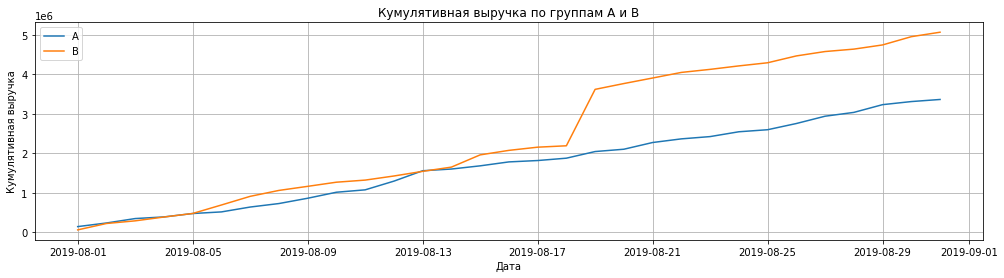

In [10]:
orders_filtered['date'] = pd.to_datetime(orders_filtered['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

datesGroups = orders_filtered[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders_filtered[
        np.logical_and(
            orders_filtered['date'] <= x['date'], orders_filtered['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

plt.figure(figsize=(17, 4))

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.grid()
plt.legend()
plt.show()

Почти весь тест, на графике кумулятивной выручки по группам, группа B в основном лидировала. А также произошёл значительный отрыв во второй части теста.

**Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

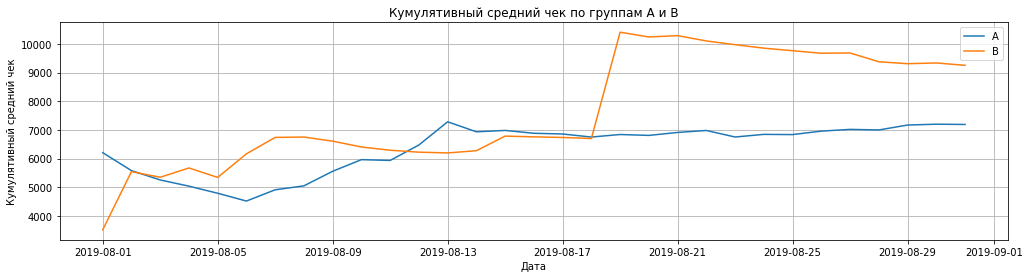

In [11]:
plt.figure(figsize=(17, 4))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.grid()
plt.legend()
plt.show()

Кумулятивное значение среднего чека по сегментам первую половину теста колебалось, но в дальнейшем произошёл значительный рывок группы В, которая лидировала оставшуюся часть теста. Вероятно, тогда были совершены крупные покупки у данной группы.

**Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

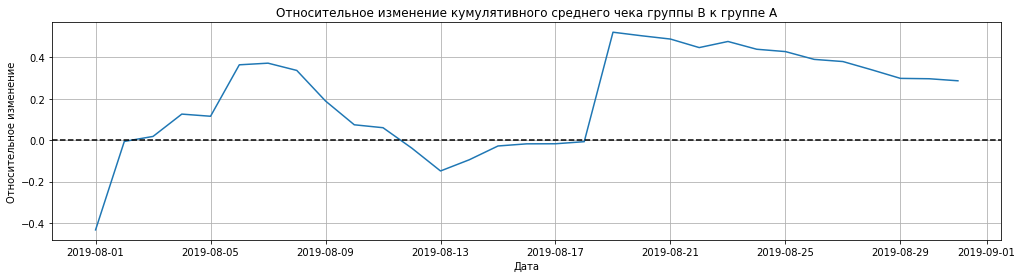

In [12]:
plt.figure(figsize=(17, 4))

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid()
plt.show()

На графике относительного изменения кумулятивного среднего чека группы B к группе A, результаты теста менялись в несколько дат. Но самое значительное относительное изменение было во второй половине теста. Видимо, именно тогда были совершены аномальные заказы.

**Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

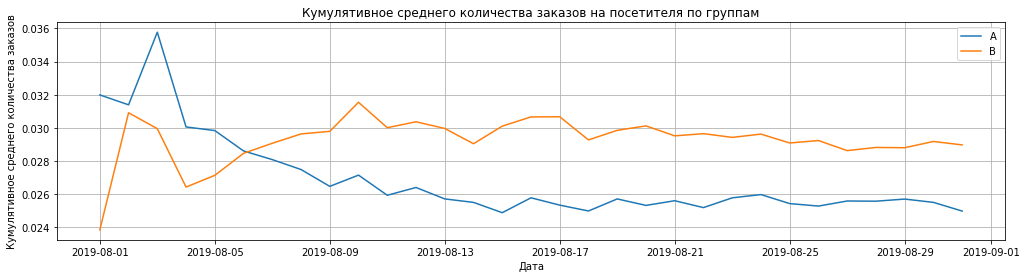

In [13]:
plt.figure(figsize=(17, 4))

# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивное среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднего количества заказов')
plt.legend()
plt.grid()
plt.show()

В начале теста сегмент A в основном имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.

**Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**

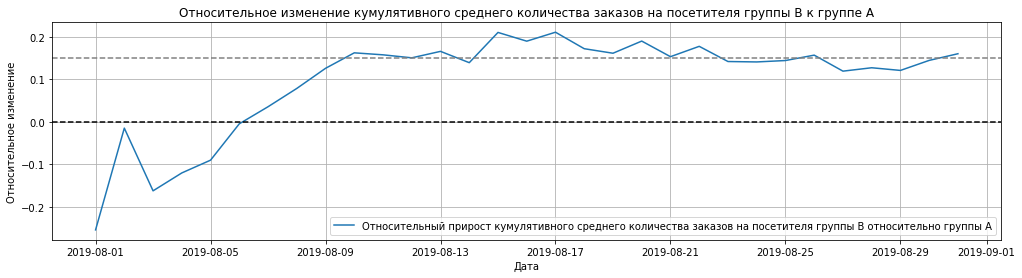

In [14]:
plt.figure(figsize=(17, 4))

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid()
plt.show()

На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, почти с самого начала теста группа B лидирует по метрике: становясь лучше и лучше, и зафиксировавшись в пределах примерно 10-20% относительно группы A.

**Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

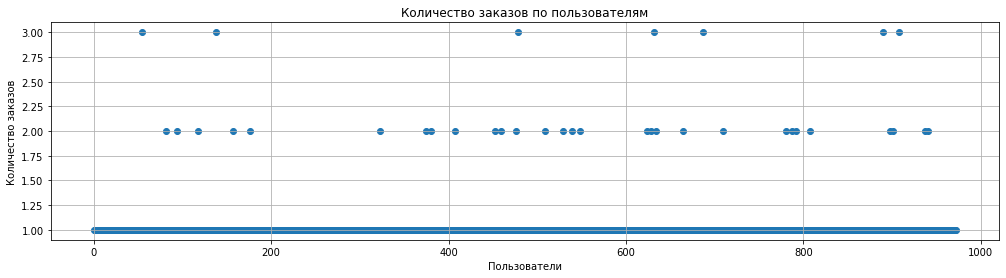

In [15]:
plt.figure(figsize=(17, 4))

ordersByUsers = (
    orders_filtered.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid()
plt.show()

Пользователей, заказавших более 2 раз, совсем мало. Они вполне могут быть аномальными.

**Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [16]:
# Метод np.percentile('column', [percentile1, percentile2]) находит перцентили.
orders_percentile = np.percentile(ordersByUsers['orders'], [95, 99])
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Исходя из расчёта перцентилей, границей можно считать 2 заказа.

**Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

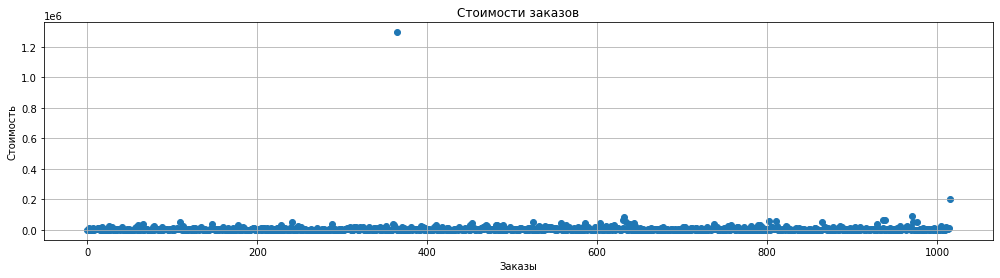

In [17]:
x_values = pd.Series(range(0, len(orders_filtered['revenue'])))
plt.figure(figsize=(17, 4))
plt.scatter(x_values, orders_filtered['revenue']) 
plt.title('Стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.grid()
plt.show()

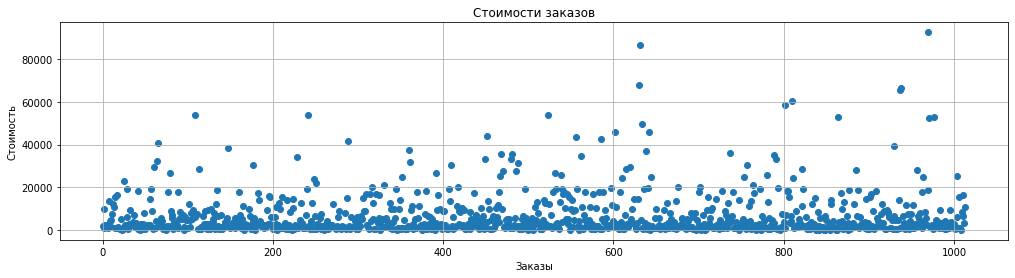

In [18]:
filtered_orders = orders_filtered[orders_filtered['revenue'] <= 100000]
x_values = pd.Series(range(0, len(filtered_orders)))
plt.figure(figsize=(17, 4))
plt.scatter(x_values, filtered_orders['revenue']) 
plt.title('Стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость')
plt.grid()
plt.show()

Все заказы находятся в пределах 100 000 руб. 1 выброс за пределами 1 200 000 руб. Определённо это аномалия.

**Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

In [19]:
revenue_percentile = np.percentile(orders_filtered['revenue'], [95, 99])
np.percentile(orders_filtered['revenue'], [95, 99])

array([26785., 53904.])

Исходя из расчёта перцентилей, границей можно считать 53904 руб.

**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

**Среднее количество заказов на посетителя («сырые» данные)**:

 - **Нулевая гипотеза (H0)**: Среднее количество заказов на посетителя в группе A равно среднему количеству заказов на посетителя в группе B.
 - **Альтернативная гипотеза (H1)**: Среднее количество заказов на посетителя в группе A отличается от среднего количества заказов на посетителя в группе B.
 - **Уровень значимости (alpha)**: 0.05.
 - **Метод проверки гипотез**: тест Манна-Уитни.

In [20]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders_filtered[orders_filtered['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders_filtered[orders_filtered['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders_filtered[orders_filtered['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders_filtered[orders_filtered['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value для сравнения среднего между группами:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие в среднем между группами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value для сравнения среднего между группами: 0.011
Относительное различие в среднем между группами: 0.160


P-value меньше 0.05, потому нулевую гипотезу отвергаем. Анализ «сырых данных» сообщает, что в среднем количестве заказов между группами есть статистически значимые различия.

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

**Средний чек заказа («сырые» данные)**:

 - **Нулевая гипотеза (H0)**: Средний чек заказа в группе A равен среднему чеку заказа в группе B.
 - **Альтернативная гипотеза (H1)**: Средний чек заказа в группе A отличается от среднего чека заказа в группе B.
 - **Уровень значимости (alpha)**: 0.05.
 - **Метод проверки гипотез**: тест Манна-Уитни.

In [21]:
print('p-value для сравнения средних чеков между группами:', '{0:.3f}'.format(stats.mannwhitneyu(orders_filtered[orders_filtered['group']=='A']['revenue'], orders_filtered[orders_filtered['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B:', '{0:.3f}'.format(orders_filtered[orders_filtered['group']=='B']['revenue'].mean()/orders_filtered[orders_filtered['group']=='A']['revenue'].mean()-1))

p-value для сравнения средних чеков между группами: 0.829
Относительный прирост среднего чека группы B: 0.287


P-value больше 0.05 — статистически значимых отличий в среднем чеке между группами нет. Нулевую гипотезу не отвергаем.

**Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

**Среднее количество заказов на посетителя («очищенные» данные)**:

 - **Нулевая гипотеза (H0)**: Среднее количество заказов на посетителя в группе A (очищенные данные) равно среднему количеству заказов на посетителя в группе B (очищенные данные).
 - **Альтернативная гипотеза (H1)**: Среднее количество заказов на посетителя в группе A (очищенные данные) отличается от среднего количества заказов на посетителя в группе B (очищенные данные).
 - **Уровень значимости (alpha)**: 0.05.
 - **Метод проверки гипотез**: тест Манна-Уитни.

In [22]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_percentile[1]]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_percentile[1]]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_percentile[1]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value для сравнения среднего между очищенными группами:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего очищенной группы B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value для сравнения среднего между очищенными группами: 0.007
Относительный прирост среднего очищенной группы B: 0.189


При расчёте статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A. Отвергаем нулевую гипотезу.

**Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.**

**Средний чек заказа («очищенные» данные)**:

 - **Нулевая гипотеза (H0)**: Средний чек заказа в группе A (очищенные данные) равен среднему чеку заказа в группе B (очищенные данные).
 - **Альтернативная гипотеза (H1)**: Средний чек заказа в группе A (очищенные данные) отличается от среднего чека заказа в группе B (очищенные данные).
 - **Уровень значимости (alpha)**: 0.05.
 - **Метод проверки гипотез**: тест Манна-Уитни.

In [23]:
print('p-value для сравнения средних чеков между очищенными группами:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_filtered[
                np.logical_and(
                    orders_filtered['group'] == 'A',
                    np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_filtered[
                np.logical_and(
                    orders_filtered['group'] == 'B',
                    np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека очищенной группы B:',
    "{0:.3f}".format(
        orders_filtered[
            np.logical_and(
                orders_filtered['group'] == 'B',
                np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_filtered[
            np.logical_and(
                orders_filtered['group'] == 'A',
                np.logical_not(orders_filtered['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value для сравнения средних чеков между очищенными группами: 0.788
Относительный прирост среднего чека очищенной группы B: -0.032


Нет статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным. Нулевую гипотезу не отвергаем.

**Примите решение по результатам теста и объясните его. Варианты решений:**

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

По результатам теста было принято решение остановить тест и зафиксировать победу группы В.

Вот причины этого:

1. Почти весь тест, на графике кумулятивной выручки по группам, группа B в основном лидировала.
2. Кумулятивное значение среднего чека по сегментам первую половину теста колебалось, но в дальнейшем произошёл значительный рывок группы В, которая лидировала оставшуюся часть теста.
3. На графике относительного изменения кумулятивного среднего чека группы B к группе A, группа В победила во второй половине теста.
4. В начале теста сегмент A в основном имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.
5. На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, почти с самого начала теста группа B лидирует по метрике: становясь лучше и лучше, и зафиксировавшись в пределах примерно 10-20% относительно группы A.
6. При расчёте статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

Единственный довод против, это то, что нет статистически значимых различий в среднем чеке заказа между группами как по сырым, так и по «очищенным» данным.

## Общий вывод

В начале исследования дано 3 датафрейма с гипотезами, заказами и количеством пользователей.

При проверке типов данных, неверно указан тип только у дат. В последствии этот тип был изменён. Пропусков и дубликатов нет.

На этапе приоритизации гипотез, были сделаны 2 расчёта с помощью фреймворков ICE и RICE.

 - В случае ICE, наиболее перспективными гипотезами оказались 8, 0, 7, 6.
 - В случае RICE, наиболее перспективными гипотезами оказались 7, 2, 0, 6.

При применении RICE вместо ICE, 0, 6, и 7 гипотезы также остались наиболее перспективными. Однако теперь, 8 гипотеза не является одной из 4-х самых приоритетных гипотез. Её место заняла 2 гипотеза. Так произошло, потому что в расчёт был добавлен параметр Reach.

**Анализ A/B-теста**

Пользователей, заказавших более 2 раз, совсем мало. Они вполне могут быть аномальными. Исходя из расчёта перцентилей, границей можно считать 2 заказа.

Все заказы находятся в пределах 100 000 руб. 1 выброс за пределами 1 200 000 руб. Определённо это аномалия. Исходя из расчёта перцентилей, границей можно считать 53904 руб.

По результатам теста было принято решение остановить тест и зафиксировать победу группы В.

Вот причины этого:

1. Почти весь тест, на графике кумулятивной выручки по группам, группа B в основном лидировала.
2. Кумулятивное значение среднего чека по сегментам первую половину теста колебалось, но в дальнейшем произошёл значительный рывок группы В, которая лидировала оставшуюся часть теста.
3. На графике относительного изменения кумулятивного среднего чека группы B к группе A, группа В победила во второй половине теста.
4. В начале теста сегмент A в основном имел большее кумулятивное среднее количество заказов, но постепенно сегмент B выровнялся и зафиксировался примерно около одного значения, больше значения сегмента A.
5. На графике относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A, почти с самого начала теста группа B лидирует по метрике: становясь лучше и лучше, и зафиксировавшись в пределах примерно 10-20% относительно группы A.
6. При расчёте статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным, как и в случае с сырыми данными, статистическая значимость достигнута. Сегмент B значительно лучше сегмента A.

Единственный довод против, это то, что нет статистически значимых различий в среднем чеке заказа между группами как по сырым, так и по «очищенным» данным.